# **Aprendizaje supervisado**
# SL03. Regresión Lineal

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## <font color='blue'>**Regresion lineal simple**</font>

La **Regresión Lineal** es un método estadístico que modela la relación entre una variable dependiente $Y$ y una o más variables independientes $X_i$. Su objetivo es encontrar la mejor línea que minimice el error entre los valores observados y los valores predichos.

Para un modelo de regresión lineal simple con una variable independiente, la ecuación se expresa como:

$$ Y = \beta_0 + \beta_1 X + \varepsilon $$

Donde:
- $\beta_0$ es la intersección con el eje $Y$ (término independiente).
- $\beta_1$ es el coeficiente de regresión (pendiente de la recta).
- $\varepsilon$ es el término de error.


El ajuste del modelo se realiza minimizando el **error cuadrático medio** (MSE):

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $$

donde $\hat{Y}_i$ son los valores predichos por el modelo.

La regresión lineal se usa en predicción, inferencia estadística y análisis de relaciones entre variables.


Considere los siguientes datos, que se encuentran dispersos sobre una línea con una pendiente de 2 y una intersección de -5:

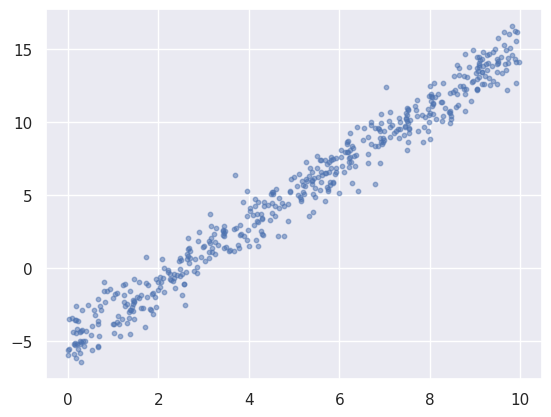

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(500)
y = 2 * x - 5 + rng.randn(500)
plt.scatter(x, y, s=10, alpha=0.5)
plt.show()

Usaremos el estimador de Scikit-Learn ``LinearRegression`` para ajustar la data y construir el modelo:

In [3]:
x.shape

(500,)

In [4]:
x[:, np.newaxis].shape

(500, 1)

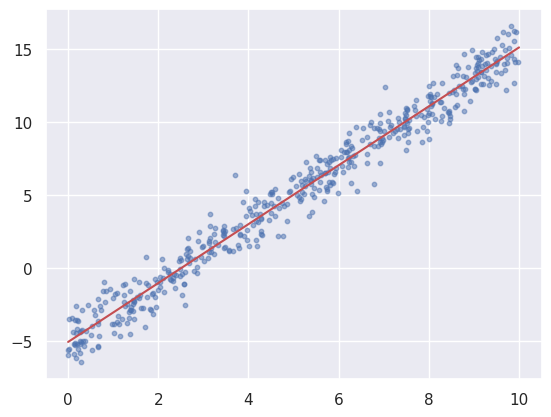

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, s=10, alpha=0.5)
plt.plot(xfit, yfit, c='r')
plt.show()

La pendiente y la intersección de los datos están contenidos en los parámetros de ajuste del modelo. En Scikit-Learn estos parámetros siempre están marcados con un guión bajo al final.

Aquí los parámetros relevantes son `` coef_`` e `` intercept_``:

In [6]:
print("Pendiente:  ", model.coef_[0])
print("Intercepto: ", model.intercept_)

Pendiente:   2.0144929846770885
Intercepto:  -5.0337635250371235


Vemos que los resultados están muy cerca de los valores utilizados para crear los datos de entrada como podríamos esperar.

Sin embargo, el estimador de ``LinearRegression`` es mucho más capaz que esto; además de ajustes simples en línea recta, también puede manejar modelos lineales multidimensionales de la forma:
<br><br>
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \varepsilon $$
<br>

donde hay multiples valores $x$. A este caso lo llamamos **Regresión Lineal Múltiple**.
Geométricamente, esto es similar a ajustar un plano a puntos en tres dimensiones, o ajustar un hiperplano a puntos en dimensiones más altas.

La naturaleza multidimensional de tales regresiones las hace más difíciles de visualizar, pero podemos ver uno de estos ajustes en acción construyendo algunos datos de ejemplo, usando el operador de multiplicación de matrices de NumPy:

In [7]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


Aquí, los datos $ y $ se construyen a partir de tres valores $ x $ aleatorios, y la regresión lineal recupera los coeficientes utilizados para construir los datos.

De esta manera, podemos usar el estimador único de ``LinearRegression``  para ajustar líneas, planos o hiperplanos a nuestros datos.
Todavía parece que este enfoque se limitaría a relaciones estrictamente lineales entre variables, pero resulta que también podemos relajar esto.

## <font color='green'>Actividad 1</font>

1. Realice un 5-fold cross validation con el modelo de regresión lineal con los datos anteriores ($X$ e $y$).
2. Evalúe el error para los distintos conjuntos de test.

¿Qué tan estable es el modelo?, ¿Cuán bueno es el error?


In [9]:
# Tu código aquí ...

import numpy as np

# Semilla para reproducibilidad
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)

# Modelo lineal exacto: y = 0.5 + 1.5 * X[:,0] - 2.0 * X[:,1] + 1.0 * X[:,2]
y = 0.5 + np.dot(X, [1.5, -2., 1.])



In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, make_scorer

# Crear el modelo de regresión lineal
model = LinearRegression()

# Definir el scorer de error: usaremos el error cuadrático medio (MSE)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Realizar cross validation con 5 pliegues
cv_results = cross_validate(model, X, y, cv=5, scoring=mse_scorer, return_train_score=True)

# Extraer los resultados: error en cada conjunto de test y de entrenamiento
test_mse = -cv_results['test_score']  # Negativo para recuperar los MSE reales
train_mse = -cv_results['train_score']

print("MSE en entrenamiento por fold:")
print(train_mse)

print("\nMSE en prueba por fold:")
print(test_mse)


MSE en entrenamiento por fold:
[1.01296211e-29 5.28890022e-29 1.76450620e-29 1.02016093e-27
 4.29570585e-29]

MSE en prueba por fold:
[9.90020436e-30 5.37115669e-29 1.82542722e-29 1.47659046e-27
 4.29904541e-29]


**Conclusiones**

**Estabilidad:**

El modelo es extremadamente estable. La validación cruzada muestra que, independientemente del fold utilizado, el error (MSE) es casi idéntico, lo que indica que el modelo no depende significativamente de la partición de los datos.

**Calidad del error:**

El error es excelente, al ser prácticamente cero en todos los folds. Esto confirma que el modelo lineal se ajusta de forma exacta a la función generada.

**Nota: En un contexto real, normalmente se tiene ruido en los datos, lo que conlleva a que el error nunca sea exactamente cero y que se observe algo de variabilidad entre folds. Este ejercicio, al trabajar con datos generados de forma determinista, sirve como una buena validación de que la implementación y el proceso de validación cruzada funcionan correctamente.**

<font color='green'>Fin Actividad 1</font>

## <font color='blue'>**Regresión de funciones base**</font>

### Expansión del espacio de hipótesis $H$

En la regresión lineal, buscamos una función $g$ dentro de un conjunto de funciones posibles $H$. En su forma más simple, este conjunto se define como:

$$ h(x) = w_0 + \sum_{i=1}^{D} w_i x_i $$

Aquí, la salida $h(x)$ es una combinación lineal de las variables de entrada $x_i$, con coeficientes $w_i$. Sin embargo, este modelo solo puede capturar **relaciones lineales** entre $x_i$ y $y$, lo que limita su capacidad para representar patrones más complejos.

Para extender este enfoque a relaciones **no lineales**, pero manteniendo un modelo lineal en los parámetros, transformamos las variables de entrada usando **funciones base** $\phi_i(x)$:

$$ h(x) = w_0 + \sum_{i=1}^{M} w_i \phi_i(x) $$

Donde $\phi_i(x)$ son funciones que convierten los datos originales en una nueva representación, permitiendo modelar relaciones más complejas sin perder la estructura lineal en los coeficientes $w_i$. De esta manera, seguimos utilizando técnicas de regresión lineal, pero en un espacio de características transformado. a esto le llamamos **transformación de funciones base**.


### Expansión mediante funciones base

En lugar de trabajar directamente con las variables $x_i$, podemos aplicar transformaciones mediante **funciones base**:

$$ \phi_1, \phi_2, ..., \phi_M: \mathbb{R}^D \rightarrow \mathbb{R} $$

Así, redefinimos la familia de funciones $H$ como:

$$ h(x) = w_0 + \sum_{i=1}^{M} w_i \phi_i(x) $$

donde $\phi_i(x)$ son funciones que transforman la entrada original $x$ a un nuevo espacio de representación.

### Ejemplo: Regresión Polinomial

Un caso común es elegir funciones base polinomiales:

$$ \phi_n(x) = x^n $$

lo que transforma el modelo en:

$$ y = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \dots + w_M x^M $$

Este modelo sigue siendo **lineal en los parámetros** $w_i$. La linealidad se refiere al hecho de que los coeficientes $w_n$ nunca se multiplican ni se dividen entre sí.
Lo que hemos hecho efectivamente es tomar nuestros valores unidimensionales $x$ y proyectarlos en una dimensión superior, de modo que un ajuste lineal pueda encajar relaciones más complicadas (**no lineales**) entre $x$ y $y$.


### Interpretación Geométrica

El uso de funciones base **proyecta los datos en un espacio de mayor dimensión**, donde una regresión lineal puede modelar relaciones más complejas. Este enfoque es fundamental en técnicas como:

- **Regresión polinomial** (potencias de $x$).
- **Funciones de base radial (RBF)** (como en redes neuronales y SVM).

La clave es que, aunque la relación entre las variables transformadas y la salida puede ser no lineal, el modelo sigue siendo **lineal en los coeficientes** $w_i$, lo que permite aplicar técnicas de optimización estándar.

### __Funciones de base polinomial__

Esta proyección polinomial es lo suficientemente útil como para estar integrada en Scikit-Learn, utilizando el transformador ``PolynomialFeatures``:

In [11]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Vemos aquí que el transformador ha convertido nuestra matriz unidimensional en una matriz tridimensional tomando el exponente de cada valor.
Esta nueva representación de datos de mayor dimensión se puede conectar a una regresión lineal.


In [12]:
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

Con esta transformación en su lugar, podemos usar el modelo lineal para ajustar relaciones mucho más complicadas entre $x$ y $y$.
Por ejemplo, aquí hay una onda sinusoidal con ruido:

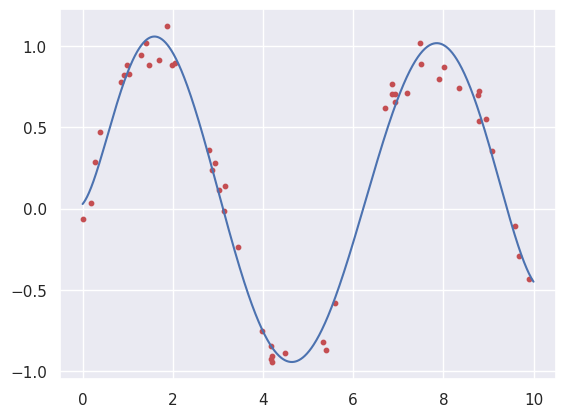

In [13]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y) # Un espacio de 7 dimensiones más un bias.
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, s=10, c='r')
plt.plot(xfit, yfit);

In [14]:
print(poly_model.steps[1][1].coef_) # 8 Coeficientes

[ 0.00000000e+00  3.31250194e-01  1.28845778e+00 -1.06474496e+00
  2.90659230e-01 -3.57011703e-02  2.01614685e-03 -4.20513337e-05]


Nuestro modelo lineal, mediante el uso de funciones de base polinomial de séptimo orden, puede proporcionar un ajuste excelente a estos datos no lineales.

# **Funciones Base Gaussianas (RBF)**


Las **Funciones de Base Radial (RBF)** permiten interpolar datos dispersos mediante la combinación de funciones base centradas en cada punto de entrenamiento. Un caso particular de RBF es la **función gaussiana**, que es ampliamente utilizada por su capacidad de aproximación universal.

La función gaussiana está definida como:

$$
f(x, \mu) = a \cdot \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

Donde:
- $\mu$ es el centro de la base.
- $\sigma$ es la dispersión, que controla la anchura de la campana.
- $a$ es la amplitud, determinada por los pesos $m_i$ de la interpolación.

Para interpolar una función $\varphi(x)$, se combina una suma ponderada de funciones gaussianas:

$$
\varphi(x) \approx \sum_{i=1}^{n} m_i f(x, x_i, \sigma_i)
$$

donde $m_i$ son los pesos obtenidos al resolver el sistema de interpolación $Gm = d$.

$Gm = d$ es un sistema de ecuaciones donde:
- $G$  es una matriz que mide la influencia de cada punto en los demás usando funciones base radiales.
- $m$  es un vector de coeficientes que ajusta la contribución de cada función base.
- $d$  es un vector de valores conocidos de la función en los puntos de entrenamiento.

Al resolver  $m = G^{-1} d$ , obtenemos los coeficientes que permiten reconstruir la función a partir de la suma de funciones base.

Este método es ampliamente utilizado en regresión con procesos gaussianos (GPR), interpolación espacial y redes neuronales RBF.


### Aplicación en regresión:
En un modelo de regresión con funciones base gausianas, la predicción tiene la forma:

$$ h(x) = w_0 + \sum_{i=1}^{M} w_i \phi_i(x) $$

Esto permite capturar patrones complejos manteniendo un modelo **lineal en los parámetros** $w_i$.



Veamos un ejemplo gráfico:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.06-gaussian-basis.png?raw=1)
[](#Gaussian-Basis)

Las regiones sombreadas en el gráfico son las funciones base escaladas y, cuando se suman, reproducen la curva suave a través de los datos.

Scikit-Learn no proporciona un transformador predefinido para funciones de base gaussiana en regresión, pero sí incluye kernels RBF en Gaussian Processes y SVM. Podemos construir un transformador personalizado para generar funciones de base radial explícitas si lo necesitamos.

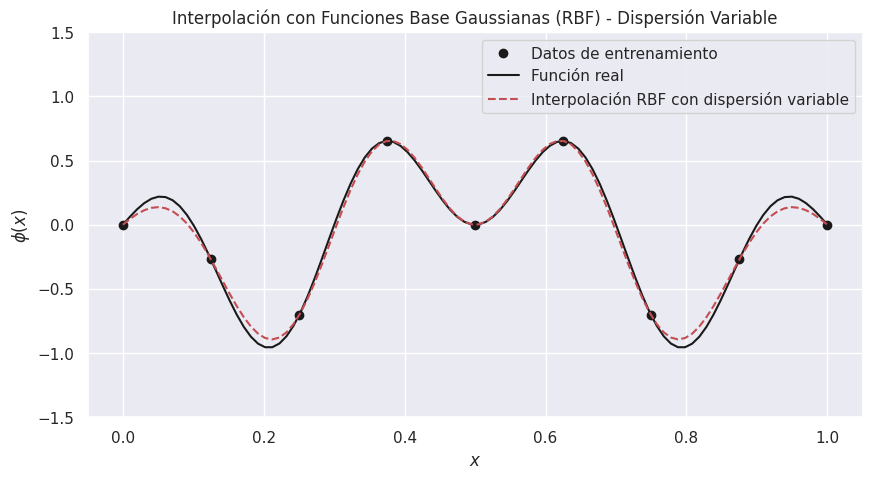

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Función original a interpolar
def phi(x):
    return np.sin(2 * np.pi * x) * np.cos(5 * np.pi * x)

# Función gaussiana base con dispersión variable
def gaussian(x1, x2, l):
    return np.exp(-((x1 - x2) ** 2) / (2 * l ** 2))

# Construcción de la matriz de kernel con dispersión variable
def kernel_matrix(X, L):
    G = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(len(X)):
            G[i, j] = gaussian(X[i], X[j], L[i])  # Dispersión propia de cada punto
    return G

# Resolver los coeficientes de interpolación
def rbf_interpolation(X, d, L):
    G = kernel_matrix(X, L)
    m = np.linalg.solve(G, d)  # Resolver el sistema lineal Gm = d
    return m

# Datos de entrenamiento
N = 9
X = np.linspace(0, 1, N)  # Puntos base
d = phi(X)  # Valores de la función en los puntos base

# Definir dispersión variable basada en la distancia a los vecinos más cercanos
L = np.zeros(N)
L[0] = L[-1] = (X[1] - X[0])  # En los bordes, usar distancia al vecino más cercano
for i in range(1, N-1):
    L[i] = (X[i+1] - X[i-1]) / 2  # Promedio de distancia a vecinos

# Obtener los coeficientes m
m = rbf_interpolation(X, d, L)

# Predicción en un rango continuo
x_pred = np.linspace(0, 1, 100)
S = np.zeros(len(x_pred))
for i in range(len(m)):
    S += m[i] * gaussian(x_pred, X[i], L[i])

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(X, d, "ko", label="Datos de entrenamiento")
plt.plot(x_pred, phi(x_pred), "k", label="Función real")
plt.plot(x_pred, S, "r--", label="Interpolación RBF con dispersión variable")
plt.legend()
plt.ylim(-1.5, 1.5)
plt.xlabel("$x$")
plt.ylabel("$\phi(x)$")
plt.title("Interpolación con Funciones Base Gaussianas (RBF) - Dispersión Variable")
plt.show()

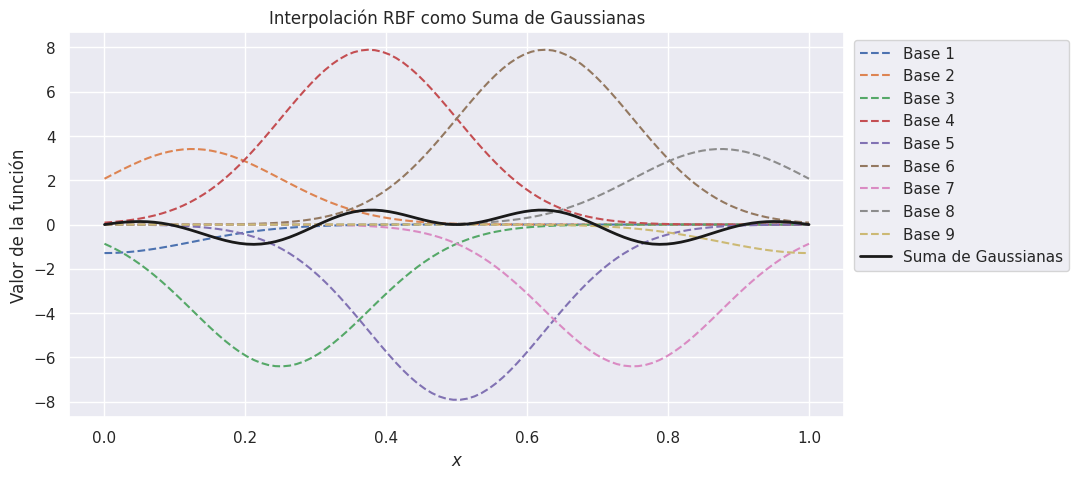

In [16]:
# Calcular la suma de las gaussianas ponderadas
S = np.zeros(len(x_pred))
for i in range(len(m)):
    S += m[i] * gaussian(x_pred, X[i], L[i])

# Graficar las funciones base gaussianas con dispersión variable
plt.figure(figsize=(10, 5))
for i in range(len(m)):
    plt.plot(x_pred, m[i] * gaussian(x_pred, X[i], L[i]), '--', label=f'Base {i+1}')

# Graficar la suma de las gaussianas en negro
plt.plot(x_pred, S, 'k', linewidth=2, label="Suma de Gaussianas")

plt.xlabel("$x$")
plt.ylabel("Valor de la función")
plt.title("Interpolación RBF como Suma de Gaussianas")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

## <font color='green'>Actividad 2</font>

Entienda el código y describa la utilidad de cada uno de los metodos definidos.

Ayuda:
1. Scikit-Learn nos proporciona dos excelentes clases base, TransformerMixin y BaseEstimator. Heredar de TransformerMixin asegura que todo lo que tenemos que hacer es escribir nuestros métodos de fit  y transform y obtenemos fit_transform de forma gratuita. La herencia de BaseEstimator garantiza que obtengamos get_params y set_params de forma gratuita. Dado que el método fit  no necesita hacer nada más que devolver el objeto en sí, todo lo que realmente necesitamos hacer después de heredar de estas clases es definir el método de transformación para nuestro transformador personalizado y obtenemos un transformador personalizado completamente funcional que puede ser sin problemas integrado con una canalización de scikit-learn! Fácil.

2. Las bases gaussianas tienen la siguiente forma. $\phi_j = wj*exp(-\frac {(x - \mu_j)^2}{2\sigma^2})$

3. Puede mirar el siguiente link. https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65


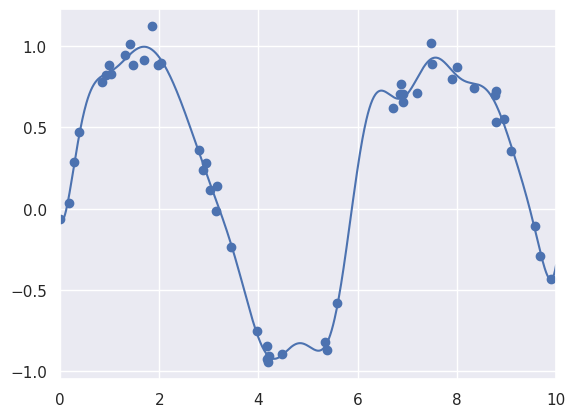

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

In [18]:
help(GaussianFeatures)

Help on class GaussianFeatures in module __main__:

class GaussianFeatures(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  GaussianFeatures(N, width_factor=2.0)
 |  
 |  Uniformly spaced Gaussian features for one-dimensional input
 |  
 |  Method resolution order:
 |      GaussianFeatures
 |      sklearn.base.BaseEstimator
 |      sklearn.utils._estimator_html_repr._HTMLDocumentationLinkMixin
 |      sklearn.utils._metadata_requests._MetadataRequester
 |      sklearn.base.TransformerMixin
 |      sklearn.utils._set_output._SetOutputMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, N, width_factor=2.0)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  fit(self, X, y=None)
 |  
 |  transform(self, X)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from sklearn.base.BaseEstimator:
 |  
 |  __getstate__(self)
 |      Helper for pickle.
 |  
 |  __repr__(self

La clase GaussianFeatures es un transformador personalizado para datos unidimensionales que extiende las capacidades de scikit-learn al heredar de BaseEstimator y TransformerMixin. Esto le permite integrarse fácilmente en pipelines de scikit-learn, aprovechando métodos como fit_transform, y facilitando la gestión de parámetros a través de get_params y set_params.

**1. El Constructor (__init__)**

In [19]:
def __init__(self, N, width_factor=2.0):
    self.N = N
    self.width_factor = width_factor


**Objetivo:**
Inicializar la instancia del transformador.

**Parámetros:**

N: Especifica el número de funciones base gausianas que se desean usar. Estas funciones se distribuirán uniformemente a lo largo del rango de los datos de entrada.

**width_factor:** Factor multiplicativo para determinar el ancho (desviación estándar) de las funciones gausianas. Un valor mayor implica funciones más anchas.

**Utilidad:**
Guarda los parámetros iniciales necesarios para definir la estructura del transformador y que serán utilizados posteriormente en el método fit para calcular los centros y la anchura de cada función gausiana.

**2. Método Estático (_gauss_basis)**

In [20]:
@staticmethod
def _gauss_basis(x, y, width, axis=None):
    arg = (x - y) / width
    return np.exp(-0.5 * np.sum(arg ** 2, axis))


**Objetivo:**
Calcular el valor de la función base gaussiana usando la fórmula:

𝜙
=
exp
⁡
(
−
1
2
(
𝑥
−
𝑦
width
)
2
)
ϕ=exp(−
2
1
​
 (
width
x−y
​
 )
2
 )


**Parámetros:**

x: Entrada o datos de prueba, que pueden ser un arreglo de valores.

y: Centros de las funciones gausianas. En el contexto de este transformador, se calculan en el método fit.

width: Valor que representa la anchura o desviación estándar escalada, que determina lo "ancha" de cada función gaussiana.

axis: Permite sumar sobre una dimensión específica en el caso de tener entradas con más de una dimensión.

**Utilidad:**
Es el núcleo del transformador. Para cada entrada x y cada centro y, calcula la salida de la función gaussiana de manera vectorizada. Al ser un método estático, no depende del estado de la instancia, lo que significa que puede ser llamado sin necesidad de una instancia de la clase.

**3. Método fit**

In [ ]:
def fit(self, X, y=None):
    # create N centers spread along the data range
    self.centers_ = np.linspace(X.min(), X.max(), self.N)
    self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
    return self


**Objetivo:**
Determinar y almacenar los parámetros necesarios para transformar los datos. Específicamente, se calculan:

**Centros de las Funciones:**
Se generan N centros equidistantes utilizando np.linspace en el rango que abarca desde el mínimo hasta el máximo valor de X.

**Anchura (width):**
Se calcula como el producto del width_factor y la distancia entre dos centros adyacentes (en concreto, entre centers_[0] y centers_[1]).

**Utilidad:**

Establece los parámetros que describirán la forma y posición de cada función gaussiana.

Al finalizar, retorna el objeto transformador (self), lo que permite la integración en pipelines y el encadenamiento de métodos.

**4. Método transform**

In [ ]:
def transform(self, X):
    return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                             self.width_, axis=1)


**Objetivo:**
Transformar los datos de entrada X aplicando las funciones base gaussianas calculadas durante el fit.

**Proceso:**

Se expande la dimensión de X con np.newaxis para permitir el broadcasting con self.centers_. Esto facilita la operación vectorizada entre los datos y los centros.

Se llama al método estático _gauss_basis, pasando:

X[:, :, np.newaxis]: La matriz de entrada con una nueva dimensión para que cada valor de X se compare con todos los centros.

self.centers_: Los centros calculados en el método fit.

self.width_: La anchura común para todas las funciones gaussianas.

axis=1: Indica la dimensión sobre la cual se realiza la suma en el cálculo de la base gaussiana.

**Utilidad:**
Transforma los datos originales a un espacio de características de mayor dimensión basado en funciones gaussianas. Esta transformación puede ayudar a capturar relaciones no lineales en los datos, permitiendo que modelos lineales (como LinearRegression) modelen patrones complejos de manera efectiva.



<font color='green'>Fin Actividad 2</font>

In [21]:
#  Desarmando el cadigo de más arriba.
def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

def fite(X, N, width_factor=2.0):
        # create N centers spread along the data range
        centers_ = np.linspace(X.min(), X.max(), N)
        width_ = width_factor * (centers_[1] - centers_[0])
        return centers_, width_

def transform(X, centers_, width_):
        return _gauss_basis(X[:, :, np.newaxis], centers_,
                                 width_, axis=1)

centers_, width_ = fite(x[:, np.newaxis], 20)
results = transform(x[:, np.newaxis],centers_, width_ )
print(results)

[[3.27895592e-04 2.14425001e-03 1.09204779e-02 4.33145936e-02
  1.33799110e-01 3.21883405e-01 6.03073613e-01 8.79971175e-01
  9.99983756e-01 8.85001128e-01 6.09987707e-01 3.27434714e-01
  1.36884646e-01 4.45667675e-02 1.13004025e-02 2.23153173e-03
  3.43193143e-04 4.11055551e-05 3.83432404e-06 2.78550207e-07]
 [3.99943777e-11 1.12290300e-09 2.45534158e-08 4.18126771e-07
  5.54536850e-06 5.72768633e-05 4.60738413e-04 2.88639655e-03
  1.40826359e-02 5.35104107e-02 1.58350339e-01 3.64943884e-01
  6.55027544e-01 9.15628737e-01 9.96794530e-01 8.45119761e-01
  5.58029614e-01 2.86960828e-01 1.14924961e-01 3.58453228e-02]
 [1.00000000e+00 8.82496903e-01 6.06530660e-01 3.24652467e-01
  1.35335283e-01 4.39369336e-02 1.11089965e-02 2.18749112e-03
  3.35462628e-04 4.00652974e-05 3.72665317e-06 2.69957850e-07
  1.52299797e-08 6.69158609e-10 2.28973485e-11 6.10193668e-13
  1.26641655e-14 2.04697171e-16 2.57675711e-18 2.52616378e-20]
 [1.47593148e-02 5.56314785e-02 1.63305716e-01 3.73343461e-01
  6.6

Ponemos este ejemplo aquí solo para aclarar que no hay nada mágico en las funciones de base polinómica: si tiene algún tipo de intuición en el proceso de generación de sus datos que le hace pensar que una base u otra podría ser apropiada, puede usarlas como bien.

## <font color='blue'>**Regularization**</font>

La introducción de funciones base en nuestra regresión lineal hace que el modelo sea mucho más flexible, pero también puede conducir muy rápidamente a un ajuste excesivo.
Por ejemplo, si elegimos demasiadas funciones de base gaussiana, terminamos con resultados que no se ven tan bien:

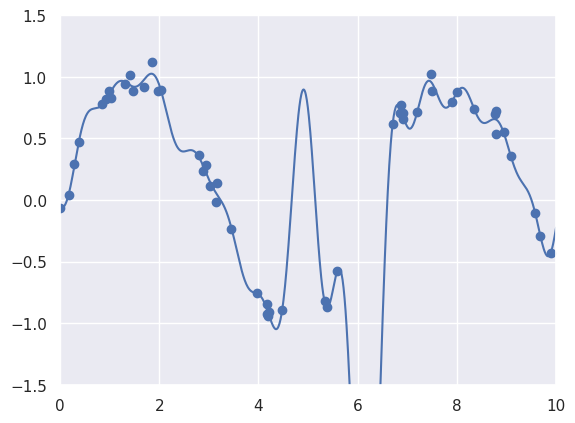

In [22]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

Con los datos proyectados a la base de 30 dimensiones, el modelo tiene demasiada flexibilidad y llega a valores extremos entre ubicaciones donde está limitado por los datos.
Podemos ver la razón de esto si graficamos los coeficientes de las bases gaussianas con respecto a sus ubicaciones:

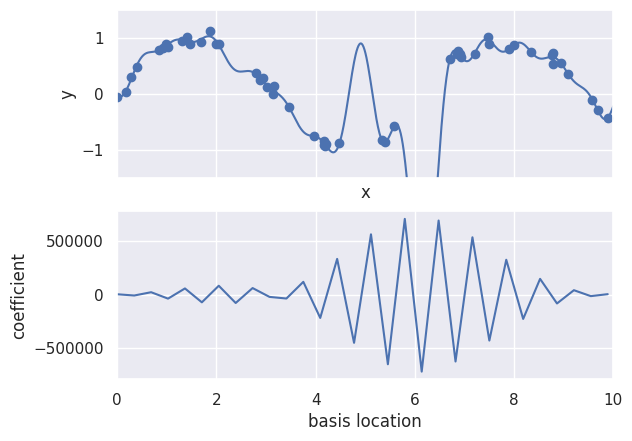

In [23]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))

    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

In [24]:
print(model.steps[1][1].coef_)

[   2443.36435598   -9176.47096975   21599.3992282   -38284.4813109
   56860.02985505  -72841.79184623   81978.13009311  -79115.41761047
   60434.04385238  -22167.9017393   -37267.57075707  118483.1400942
 -218731.22004497  332900.4713816  -451399.48208681  562296.26385455
 -651353.87494815  706669.69439048 -720130.17310242  691269.56757447
 -625660.84817605  534551.47936107 -430163.04374567  324859.32557618
 -227866.99182735  146329.62188616  -83477.46077128   40487.96542924
  -15033.04553234    3462.24245058]


El panel inferior de esta figura muestra la amplitud de la función base en cada ubicación.
Este es un comportamiento de sobreajuste típico cuando las funciones base se superponen: los coeficientes de las funciones base adyacentes explotan y se cancelan entre sí.
Sabemos que tal comportamiento es problemático, y sería bueno si pudiéramos limitar explícitamente tales picos en el modelo penalizando los valores grandes de los parámetros del modelo.
Esta penalización se conoce como *regularización* y se presenta en varias formas.

### Ridge regression ($L_2$ Regularization)

Quizás la forma más común de regularización se conoce como *ridge regression* o $ L_2 $ *regularización*, a veces también llamada *regularización de Tikhonov*.
Esto procede penalizando la suma de cuadrados (norma L2) de los coeficientes del modelo; en este caso, la penalización en el ajuste del modelo sería
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
donde $\alpha$ es un parametro libre que controla la fuerza de la penalidad.


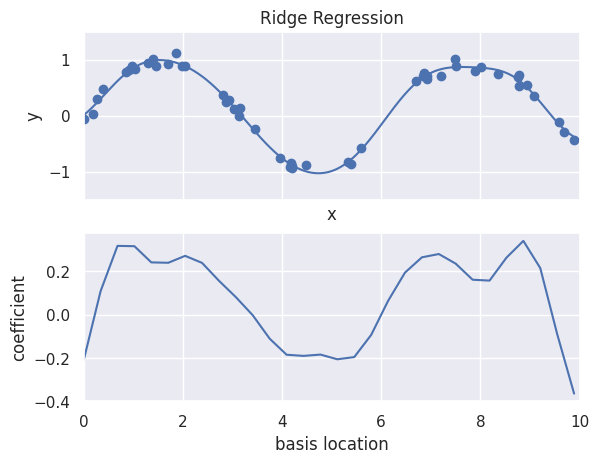

In [25]:
from sklearn.linear_model import Ridge

model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

El parámetro $\alpha$ es esencialmente una perilla que controla la complejidad del modelo resultante.
En el límite $\alpha\ \to 0$, recuperamos el resultado de regresión lineal estándar; en el límite $\alpha \to \infty$, se suprimirán todas las respuestas del modelo.
Una ventaja de la regresión de crestas en particular es que se puede calcular de manera muy eficiente, a un costo computacional apenas mayor que el modelo de regresión lineal original.

### Lasso regression ($L_1$ regularization)

Otro tipo de regularización muy común se conoce como lazo, e implica penalizar la suma de valores absolutos (1-norma) de los coeficientes de regresión:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Aunque esto es conceptualmente muy similar a la regresión de crestas, los resultados pueden diferir sorprendentemente: por ejemplo, debido a razones geométricas, la regresión de lazo tiende a favorecer *modelos dispersos* cuando es posible: es decir, preferentemente establece los coeficientes del modelo exactamente a cero.

Podemos ver este comportamiento al duplicar la figura de regresión de la cresta, pero usando coeficientes normalizados L1:

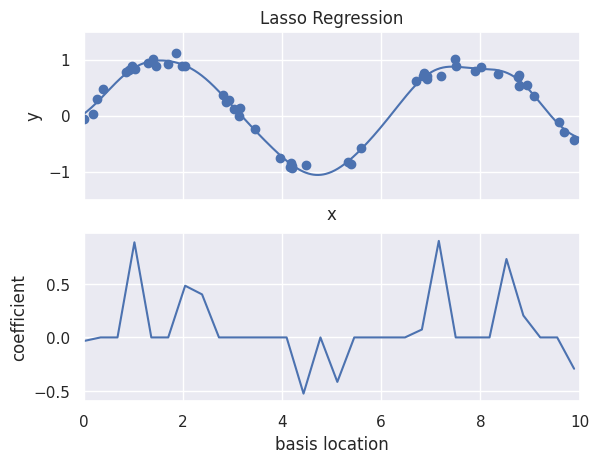

In [26]:
from sklearn.linear_model import Lasso

model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001, max_iter=5000))
basis_plot(model, title='Lasso Regression')

Con la penalización por regresión de lazo, la mayoría de los coeficientes son exactamente cero, y el comportamiento funcional está modelado por un pequeño subconjunto de las funciones básicas disponibles.
Al igual que con la regularización de crestas, el parámetro $\alpha$ ajusta la fuerza de la penalización y debe determinarse mediante, por ejemplo, validación cruzada.

## <font color='green'>Actividad 3</font>

Usaremos el *Combined Cycle Power Plant Data Set*.

1. Implementa distintos modelos de regresión para predecir el Energy Output (EP) de la planta y compare sus resultados. Los parametros entregados son los siguientes:
  * Ambient Temperature (AT)
  * Exhaust Vaucum (V)
  * Ambient Pressure (AP)
  * Relative Humidity (RH)

2. Grafique sus resultados.
3. Calcular el coeficiente de correlación de Pearson

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
file_path = '/content/drive/MyDrive/Gonzalo/CD-P2 APRENDIZAJE SUPERVISADO/CLASE 2/powerplant.csv'

In [31]:
# Cargar datos
df = pd.read_csv(file_path)
print("Dimensiones del dataset:", df.shape)
print(df.head())

Dimensiones del dataset: (47840, 5)
      AT      V       AP     RH      EP
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


Dimensiones del dataset: (47840, 5)
      AT      V       AP     RH      EP
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
Modelo: Linear Regression
  MSE: 20.234
  R2: 0.930
  Coeficiente de correlación de Pearson: 0.965

Modelo: Decision Tree
  MSE: 0.009
  R2: 1.000
  Coeficiente de correlación de Pearson: 1.000

Modelo: Random Forest
  MSE: 0.086
  R2: 1.000
  Coeficiente de correlación de Pearson: 1.000



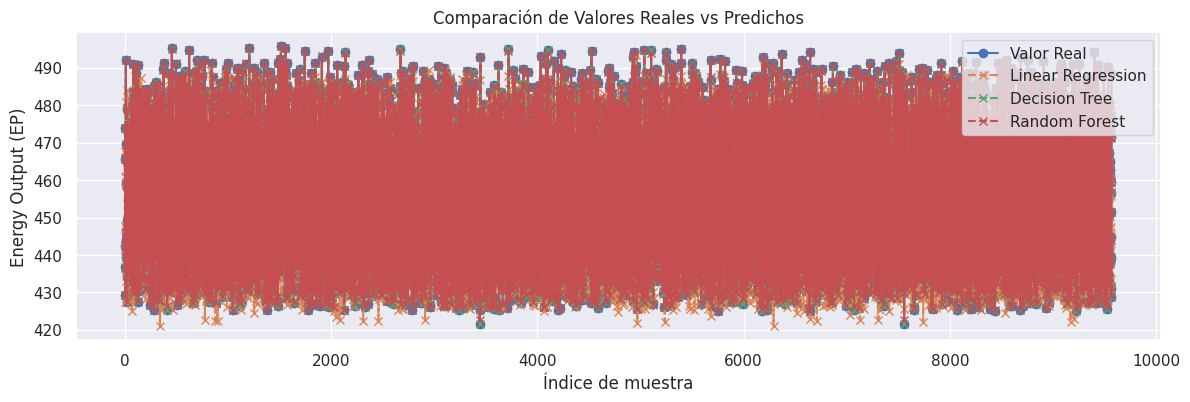

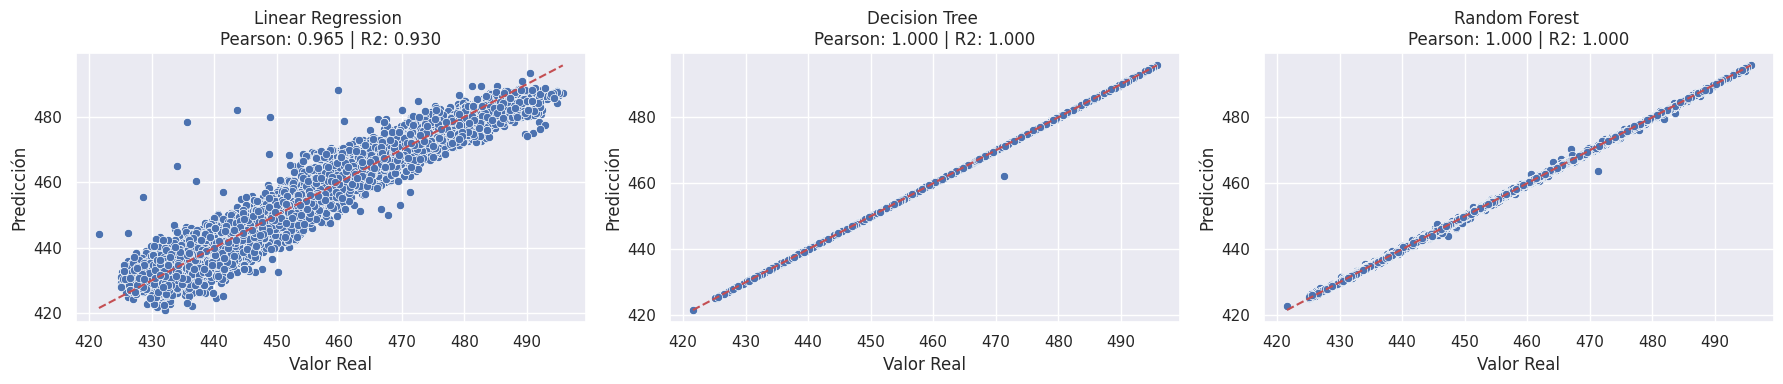

In [32]:
# Tu código aquí...

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Ruta del dataset
file_path = '/content/drive/MyDrive/Gonzalo/CD-P2 APRENDIZAJE SUPERVISADO/CLASE 2/powerplant.csv'

# Cargar datos
df = pd.read_csv(file_path)
print("Dimensiones del dataset:", df.shape)
print(df.head())

# Variables predictoras y variable objetivo
X = df[['AT', 'V', 'AP', 'RH']]
y = df['EP']   # Suponiendo que la columna de Energy Output se llama 'PE'

# Dividir en conjunto de entrenamiento y test (80% entrenamiento, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialización de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Diccionarios para guardar resultados
predictions = {}
mse_scores = {}
r2_scores = {}
pearson_coeff = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores[name] = mse
    r2_scores[name] = r2

    # Coeficiente de correlación de Pearson entre y_test y y_pred
    pearson_corr, p_val = pearsonr(y_test, y_pred)
    pearson_coeff[name] = pearson_corr

    print(f"Modelo: {name}")
    print(f"  MSE: {mse:.3f}")
    print(f"  R2: {r2:.3f}")
    print(f"  Coeficiente de correlación de Pearson: {pearson_corr:.3f}\n")

# Graficar resultados
plt.figure(figsize=(14, 4))

# Comparación gráfica: valores reales vs predicciones en función del índice
plt.plot(y_test.values, label='Valor Real', marker='o')
for name, y_pred in predictions.items():
    plt.plot(y_pred, label=name, marker='x', linestyle='--')
plt.xlabel('Índice de muestra')
plt.ylabel('Energy Output (EP)')
plt.title('Comparación de Valores Reales vs Predichos')
plt.legend()
plt.show()

# Gráfico de dispersión para cada modelo: Predicción vs Valor real
plt.figure(figsize=(18, 4))
i = 1
for name, y_pred in predictions.items():
    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Valor Real')
    plt.ylabel('Predicción')
    plt.title(f'{name} \nPearson: {pearson_coeff[name]:.3f} | R2: {r2_scores[name]:.3f}')
    i += 1
plt.tight_layout()
plt.show()


<font color='green'>Fin Actividad 3</font>

## <font color='green'>Actividad 4</font>

La regresión lineal se estudió a través del método de los minimos cuadrados. En esta actividad le proponemos el desafío de implementar la regresión lineal a traves del algoritmo de gradiente descendente.

Para esto uste debe aprender cómo funciona  el algoritmo de descenso de gradientes e implementarlo desde cero en Python y aplicarlo al problema de regresión lineal.

Para el desarrollo de la tarea, sugerimos estudiar el siguiente tutorial:

https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from numpy import c_

%matplotlib inline

data = pd.read_csv("/content/drive/MyDrive/Gonzalo/CD-P2 APRENDIZAJE SUPERVISADO/CLASE 2/powerplant.csv",header=0)
data.head()

Primeras filas del dataset:
      AT      V       AP     RH      EP
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
Theta optimizados:
[[454.34539369]
 [-11.92928556]
 [ -5.03642489]
 [  0.90913441]
 [ -1.38338799]]


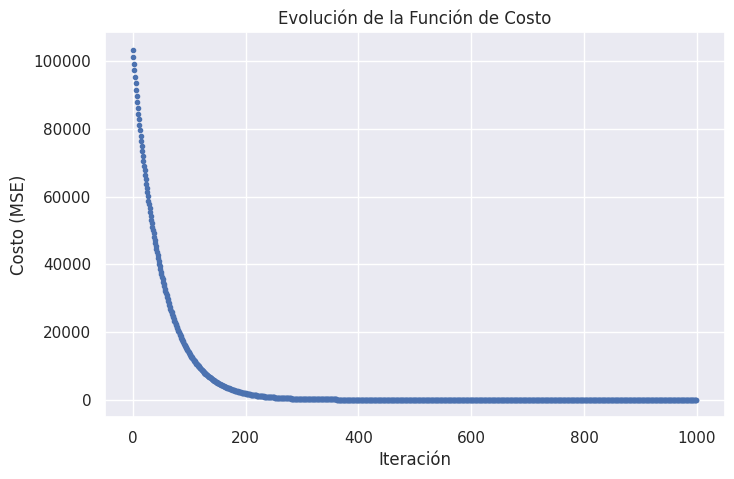

Coeficiente de determinación (R²): 0.9240078968596647


In [33]:
# Tu código aquí ...

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from numpy import c_

# Cargar el conjunto de datos
# Asegúrese de que la ruta al archivo 'powerplant.csv' es correcta.
data = pd.read_csv("/content/drive/MyDrive/Gonzalo/CD-P2 APRENDIZAJE SUPERVISADO/CLASE 2/powerplant.csv", header=0)
print("Primeras filas del dataset:")
print(data.head())

# Separar las características (X) y la variable objetivo (y)
# Se asume que la variable objetivo es la columna 'PE'
X = data.drop("EP", axis=1).values  # Matriz de características
y = data['EP'].values.reshape(-1, 1)  # Vector objetivo (reshape para que sea columna)

# Normalización de características
# La normalización ayuda a que el algoritmo de gradiente descendente converja más rápido
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Agregar el término de sesgo (bias)
# Esto se hace concatenando una columna de unos a las características normalizadas
m = X_scaled.shape[0]  # número de muestras
X_bias = c_[np.ones((m, 1)), X_scaled]  # matriz de diseño con término independiente

# Inicializar los parámetros (theta)
theta = np.zeros((X_bias.shape[1], 1))  # theta tendrá dimensión (n_features + 1) x 1

# Parámetros para el gradiente descendente
learning_rate = 0.01
n_iterations = 1000

# Lista para almacenar la evolución del costo en cada iteración
cost_history = np.zeros(n_iterations)

# Función de coste: Error Cuadrático Medio (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Implementación del gradiente descendente
for it in range(n_iterations):
    # Calcular las predicciones actuales
    predictions = X_bias.dot(theta)
    # Calcular el error (diferencia entre la predicción y la realidad)
    error = predictions - y
    # Actualizar la función de coste
    cost = (1/(2*m)) * np.sum(np.square(error))
    cost_history[it] = cost
    # Calcular el gradiente
    gradients = (1/m) * X_bias.T.dot(error)
    # Actualizar los parámetros
    theta = theta - learning_rate * gradients

# Mostrar los parámetros optimizados
print("Theta optimizados:")
print(theta)

# Graficar la evolución de la función de coste
plt.figure(figsize=(8, 5))
plt.plot(range(n_iterations), cost_history, "b.")
plt.xlabel("Iteración")
plt.ylabel("Costo (MSE)")
plt.title("Evolución de la Función de Costo")
plt.grid(True)
plt.show()

# Realizar predicciones utilizando los parámetros optimizados
y_pred = X_bias.dot(theta)

# Evaluar el modelo utilizando el coeficiente de determinación (R²)
r2 = r2_score(y, y_pred)
print("Coeficiente de determinación (R²):", r2)


<font color='green'>Fin Actividad 4</font>

# <font color='purple' style='bold' size=5>**EXPERIMENTO** </font>

MSE sin regularización: 0.07600014064033013
MSE con regularización Ridge: 0.06705309096736008


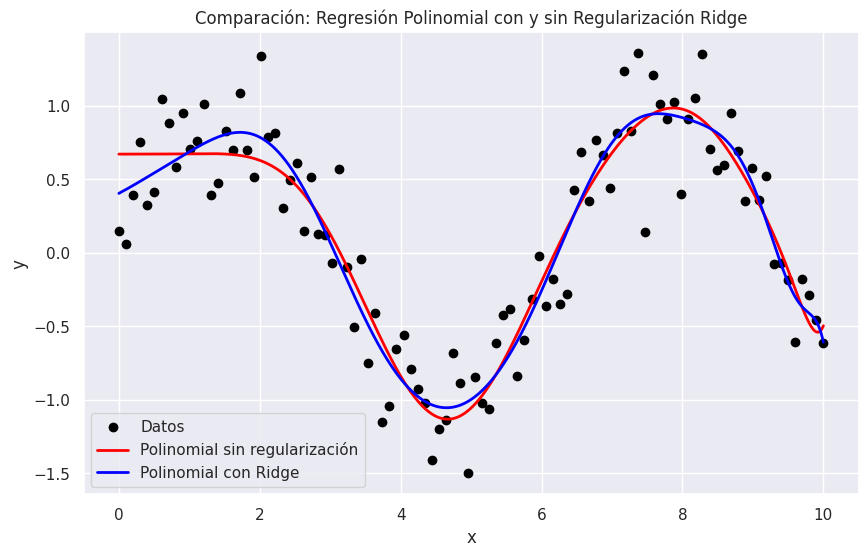

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Fijar semilla para reproducibilidad
rng = np.random.RandomState(42)

# Generar datos sintéticos: función sinusoidal con ruido
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.3 * rng.randn(len(x))

# Reformatear x para que tenga 2 dimensiones (requisito de scikit-learn)
x = x[:, None]
xfit = np.linspace(0, 10, 1000)[:, None]

# Definir el grado del polinomio (modelo potencialmente sobreajustado)
degree = 15

# Modelo sin regularización: Pipeline de transformación polinomial seguido de LinearRegression
model_lr = make_pipeline(PolynomialFeatures(degree),
                           LinearRegression())
model_lr.fit(x, y)
yfit_lr = model_lr.predict(xfit)
mse_lr = mean_squared_error(y, model_lr.predict(x))
print("MSE sin regularización:", mse_lr)

# Modelo con regularización Ridge: Misma transformación, pero con regresión Ridge
alpha = 1.0  # parámetro de regularización (puede ajustarse)
model_ridge = make_pipeline(PolynomialFeatures(degree),
                            Ridge(alpha=alpha))
model_ridge.fit(x, y)
yfit_ridge = model_ridge.predict(xfit)
mse_ridge = mean_squared_error(y, model_ridge.predict(x))
print("MSE con regularización Ridge:", mse_ridge)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Datos', color='black')
plt.plot(xfit, yfit_lr, label='Polinomial sin regularización', color='red', lw=2)
plt.plot(xfit, yfit_ridge, label='Polinomial con Ridge', color='blue', lw=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparación: Regresión Polinomial con y sin Regularización Ridge")
plt.legend()
plt.show()


**Conclusiones**

**Sin Regularización:** El modelo puede ajustarse muy bien a los datos de entrenamiento pero presentar oscilaciones pronunciadas (sobreajuste) en regiones con pocos datos.

**Con Regularización Ridge:** La penalización permite controlar los coeficientes, obteniendo una solución más suave y robusta ante el ruido. Aunque el error en el entrenamiento puede ser ligeramente mayor, el modelo tiende a generalizar mejor.

# <font color='purple' style='bold' size=5>**FIN EXPERIMENTO** </font>

# <font color='purple' style='bold' size=5>**MATERIAL ADICIONAL** </font>

**1. Elección de Funciones Base y Curiosidades**

a) Funciones Base Polinómicas vs. Funciones Base Radiales
Funciones Base Polinómicas:

Se usan para proyectar datos unidimensionales en espacios de mayor dimensión (ej. transformación de
𝑥
x en
[
𝑥
,
𝑥
2
,
𝑥
3
,
…

]
[x,x
2
 ,x
3
 ,…]). Son intuitivas y fáciles de interpretar, pero pueden llevar a un comportamiento errático (sobreajuste) cuando se utilizan grados muy altos o cuando los datos se extienden fuera del rango de entrenamiento.

**Referencia: Hastie, Tibshirani y Friedman en The Elements of Statistical Learning muestran cómo la alta varianza de modelos con polinomios de grado elevado puede desestabilizar la predicción en regiones fuera de la muestra (Hastie et al., 2009).**

Funciones Base Radiales (RBF):

Estas funciones (por ejemplo, la función gaussiana) permiten crear modelos más locales, de forma que cada función se centra en una región específica del espacio de entrada. Esto es particularmente útil cuando la relación entre las variables no es globalmente polinómica, ya que permite capturar variaciones locales sin generar oscilaciones tan marcadas.

 **Referencia: Bishop discute ampliamente el uso de redes neuronales con funciones de base radial en Pattern Recognition and Machine Learning (Bishop, 2006).**

b) Regularización: Ridge y Lasso
La regularización es una técnica clave para evitar el sobreajuste en modelos con alta complejidad. La regularización Ridge (o L2) penaliza la suma de los cuadrados de los coeficientes, lo que fuerza a la solución a ser más “suave”, mientras que la regularización Lasso (o L1) puede llevar a soluciones con coeficientes cero, facilitando la selección de variables.

Caso Práctico: En el ejercicio anterior se pudo ver que al usar muchas funciones base gaussianas sin regularización, algunos coeficientes se disparan y se produce una excesiva oscilación. La incorporación de un término de penalización (con Ridge o Lasso) ayuda a controlar estos valores extremos, mejorando la capacidad de generalización del modelo.

**Referencia: Tibshirani introdujo el Lasso en su artículo fundamental Regression Shrinkage and Selection via the Lasso (Tibshirani, 1996).**

c) Métodos Kernel y Procesos Gaussianos
El uso de funciones de base se relaciona estrechamente con el concepto de métodos kernel. Los métodos kernel, como las máquinas de soporte vectorial (SVM) o los procesos gaussianos (GP), permiten trabajar en espacios de alta o infinita dimensión sin tener que computar explícitamente la transformación. En este sentido, la idea es que se puede obtener un modelo no lineal a partir de un “kernel trick” que calcula la similitud entre datos en el espacio original.

**Referencia: Scholkopf y Smola en Learning with Kernels profundizan en esta metodología (Schölkopf & Smola, 2002).**

MSE Regresión Polinomial sin regularización: 0.07600014064033013
MSE Regresión Polinomial con Ridge: 0.06705309096736008
MSE con Funciones Base Gaussianas: 0.05968808842960731


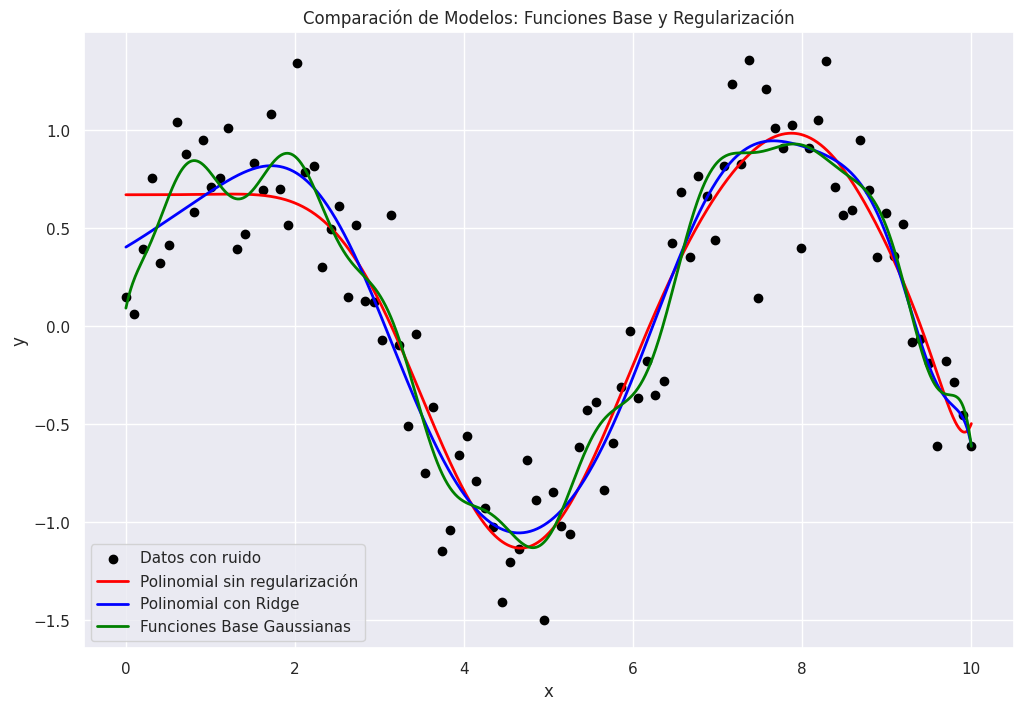

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin

# Fijar la semilla para reproducibilidad
rng = np.random.RandomState(42)

# Generar datos sintéticos: señal sinusoidal con ruido
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.3 * rng.randn(len(x))

# Reformatear x a la forma adecuada para sklearn
x = x[:, None]
xfit = np.linspace(0, 10, 1000)[:, None]

# Grado para la transformación polinomial (alto para observar sobreajuste)
degree = 15

# --- Modelo 1: Regresión Polinomial sin Regularización ---
model_poly = make_pipeline(PolynomialFeatures(degree),
                             LinearRegression())
model_poly.fit(x, y)
yfit_poly = model_poly.predict(xfit)
mse_poly = mean_squared_error(y, model_poly.predict(x))
print("MSE Regresión Polinomial sin regularización:", mse_poly)

# --- Modelo 2: Regresión Polinomial con Regularización Ridge ---
alpha = 1.0
model_ridge = make_pipeline(PolynomialFeatures(degree),
                            Ridge(alpha=alpha))
model_ridge.fit(x, y)
yfit_ridge = model_ridge.predict(xfit)
mse_ridge = mean_squared_error(y, model_ridge.predict(x))
print("MSE Regresión Polinomial con Ridge:", mse_ridge)

# --- Modelo 3: Usando Funciones Base Gaussianas ---
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Funciones base gaussianas uniformemente espaciadas para entrada unidimensional."""
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # Calcular centros uniformemente espaciados en el rango de X
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        # Anchura determinada a partir de la distancia entre centros
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        # Expande dimensiones para poder operar con broadcasting
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

# Crear el modelo con funciones base gaussianas y regresión lineal
model_gauss = make_pipeline(GaussianFeatures(20, width_factor=2.0),
                            LinearRegression())
model_gauss.fit(x, y)
yfit_gauss = model_gauss.predict(xfit)
mse_gauss = mean_squared_error(y, model_gauss.predict(x))
print("MSE con Funciones Base Gaussianas:", mse_gauss)

# --- Visualización Comparativa ---
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='black', label='Datos con ruido')

plt.plot(xfit, yfit_poly, label='Polinomial sin regularización', color='red', lw=2)
plt.plot(xfit, yfit_ridge, label='Polinomial con Ridge', color='blue', lw=2)
plt.plot(xfit, yfit_gauss, label='Funciones Base Gaussianas', color='green', lw=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparación de Modelos: Funciones Base y Regularización")
plt.legend()
plt.show()



**Bibliografía:**

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning. Springer.

Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.

Tibshirani, R. (1996). Regression Shrinkage and Selection via the Lasso. Journal of the Royal Statistical Society, Series B.

Schölkopf, B. & Smola, A. J. (2002). Learning with Kernels. MIT Press.

Documentación de scikit-learn: scikit-learn.org

# <font color='purple' style='bold' size=5>**FIN MATERIAL ADICIONAL** </font>